### Dicas

*   Antes de ir pro código, leia a descrição do desafio e busque definir pequenos passos para chegar a solução.  
*   Leia o código para se familiarizar com a solução que está em desenvolvimento;

*  Tente entender o que o código faz ou significa. 

*  Busque encontrar as partes que faltam ser colocadas e erros no código que precisam ser corrigidos;

*  Se aparecer erros, procure corrigir e/ou repita os passos acima.



# 2. Desafio: pré-processamento e nálise de dados

Utilizando o conhecimento que obtivemos essa semana, utilize o Google Colab ou o Jupyter Notebook  para fazer um programa que consiga responder às seguintes perguntas:

1. Qual foi a maior doação de pessoa física e pessoa jurídica em cada estado?
2. Qual o valor médio das doações por tipo de entidade?
3. Qual o total de doações recebidas por partido?

Dica: Use conjunto de dados "receitas_orgaos_partidarios_2020_NORDESTE.csv"

> Fonte: TSE. Repositório de dados eleitorais. Conjunto de dados [Orgão Partidário: receita - órgãos partidários - 2020](https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1)

## Pré-processamento de dados

In [1]:
from matplotlib import pyplot as plt

import pandas as pd

In [2]:
receita = pd.read_csv('receitas_orgaos_partidarios_2020_NORDESTE.csv', sep=';')
receita.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,TP_PRESTACAO_CONTAS,DT_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,CD_ESFERA_PARTIDARIA,DS_ESFERA_PARTIDARIA,...,DS_CARGO_CANDIDATO_DOADOR,NR_PARTIDO_DOADOR,SG_PARTIDO_DOADOR,NM_PARTIDO_DOADOR,NR_RECIBO_DOACAO,NR_DOCUMENTO_DOACAO,SQ_RECEITA,DT_RECEITA,DS_RECEITA,VR_RECEITA
0,22/07/2021,23:25:00,2020,2,Ordinária,Final,14/12/2020,1220401248,M,Municipal,...,#NULO#,-1,#NULO#,#NULO#,P15000411452PI000005A,#NULO#,18729827,29/09/2020,LOC. DE IMOVEL P/ FUNCION. DE COMITE ELEITORAL...,1500
1,22/07/2021,23:25:00,2020,2,Ordinária,Final,08/03/2021,1364490302,M,Municipal,...,#NULO#,-1,#NULO#,#NULO#,P15000412165PI000002A,#NULO#,19789208,27/09/2020,CESSÃO DE SERVIÇOS DE ASSESSORIA E CONSULTORIA...,1500
2,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405469,M,Municipal,...,#NULO#,40,PSB,Partido Socialista Brasileiro,P17000412661PI000004A,001,19413470,08/12/2020,#NULO#,2
3,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405469,M,Municipal,...,#NULO#,40,PSB,Partido Socialista Brasileiro,P17000412661PI000001A,850020,19413467,21/10/2020,#NULO#,14000
4,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405081,M,Municipal,...,#NULO#,40,PSB,Partido Socialista Brasileiro,P40000412564PI000001A,850007,19352758,09/10/2020,#NULO#,28000


In [3]:
receita_partidos = receita[receita['TP_PRESTACAO_CONTAS'] == 'Final'].copy()

In [4]:
def classifica_doadora(row):
  if row == -1:
    return 'pessoa física'
  else:
    return 'pessoa jurídica'

In [5]:
receita_partidos['TIPO_DOADORA'] = receita_partidos['CD_CNAE_DOADOR'].apply(classifica_doadora)

In [6]:
receita_partidos = receita_partidos[['ANO_ELEICAO', 'SG_UF', 'SG_PARTIDO', 'NM_PARTIDO', 'DT_RECEITA', 
                                     'DS_RECEITA', 'VR_RECEITA', 'TIPO_DOADORA']].copy()

In [7]:
receita_partidos = receita_partidos.loc[:].replace({'#NULO#': None})

In [8]:
receita_partidos.head()

,ANO_ELEICAO,SG_UF,SG_PARTIDO,NM_PARTIDO,DT_RECEITA,DS_RECEITA,VR_RECEITA,TIPO_DOADORA
0,2020,PI,MDB,Movimento Democrático Brasileiro,29/09/2020,LOC. DE IMOVEL P/ FUNCION. DE COMITE ELEITORAL...,1500,pessoa física
1,2020,PI,MDB,Movimento Democrático Brasileiro,27/09/2020,CESSÃO DE SERVIÇOS DE ASSESSORIA E CONSULTORIA...,1500,pessoa física
2,2020,PI,PSB,Partido Socialista Brasileiro,08/12/2020,None,2,pessoa jurídica
3,2020,PI,PSB,Partido Socialista Brasileiro,21/10/2020,None,14000,pessoa jurídica
4,2020,PI,PSB,Partido Socialista Brasileiro,09/10/2020,None,28000,pessoa jurídica


# Qual foi a maior doação de pessoa física e pessoa jurídica em cada estado?


In [9]:
tipo_entidade = receita_partidos[['SG_UF', 'TIPO_DOADORA', 'VR_RECEITA']]

In [10]:
agrupamento_pf_pj = tipo_entidade.groupby(by=['SG_UF', 'TIPO_DOADORA']).max()
agrupamento_pf_pj

VR_RECEITA
SG_UF TIPO_DOADORA               
AL    pessoa física         17665
      pessoa jurídica     3900000
BA    pessoa física        200000
      pessoa jurídica    11900000
CE    pessoa física        200000
      pessoa jurídica     3900000
MA    pessoa física        100000
      pessoa jurídica     3900000
PB    pessoa física         23000
      pessoa jurídica     2169395
PE    pessoa física        150000
      pessoa jurídica     4998000
PI    pessoa física         23708
      pessoa jurídica     3900000
RN    pessoa física         25000
      pessoa jurídica     3900000
SE    pessoa física         31000
      pessoa jurídica     4000000

## Qual o valor médio das doações por tipo de entidade?

In [11]:
vr_receita_pf = receita_partidos[receita_partidos['TIPO_DOADORA'] == 'pessoa física']['VR_RECEITA']
vr_receita_pj = receita_partidos[receita_partidos['TIPO_DOADORA'] == 'pessoa jurídica']['VR_RECEITA']

vr_receita_pf_lista = vr_receita_pf.to_list()
vr_receita_pj_lista = vr_receita_pj.to_list()

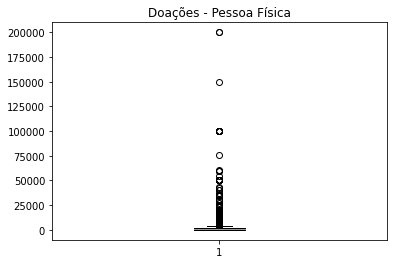

In [12]:
fig, ax = plt.subplots()

ax.set_title('Doações - Pessoa Física')
ax.boxplot(vr_receita_pf_lista)

plt.show()

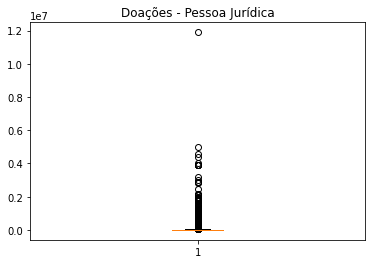

In [13]:
fig1, ax1 = plt.subplots()

ax1.set_title('Doações - Pessoa Jurídica')
ax1.boxplot(vr_receita_pj_lista)

plt.show()

In [14]:
pf_mediana = vr_receita_pf.median()
pj_mediana = vr_receita_pj.median()

print(f'O valor médio (mediada) das doações realizadas por pessoa física foi R${pf_mediana} e por pessoa jurídica R${pj_mediana}')

O valor médio (mediada) das doações realizadas por pessoa física foi R$600.0 e por pessoa jurídica R$1500.0


## Qual o total de doações recebidas por partido?

In [15]:
receita_partidos.columns

Index(['ANO_ELEICAO', 'SG_UF', 'SG_PARTIDO', 'NM_PARTIDO', 'DT_RECEITA',
       'DS_RECEITA', 'VR_RECEITA', 'TIPO_DOADORA'],
      dtype='object')

In [16]:
df_total_doacoes = receita_partidos[['SG_PARTIDO', 'NM_PARTIDO', 'VR_RECEITA']]
total_doacoes = df_total_doacoes.groupby(by=['SG_PARTIDO', 'NM_PARTIDO']).sum()
total_doacoes

,,VR_RECEITA
SG_PARTIDO,NM_PARTIDO,
AVANTE,AVANTE,1555473
CIDADANIA,Cidadania,5433420
DC,Democracia Cristã,1415608
DEM,Democratas,2521140
MDB,Movimento Democrático Brasileiro,39185338
NOVO,Partido Novo,138588
PATRIOTA,Patriota,946022
PC do B,Partido Comunista do Brasil,2393497
PCB,Partido Comunista Brasileiro,146072


In [17]:
total_doacoes = total_doacoes.add_suffix('_SOMA').reset_index()
total_doacoes = total_doacoes.sort_values(by=['VR_RECEITA_SOMA'], ascending=False)

In [18]:
total_doacoes

,SG_PARTIDO,NM_PARTIDO,VR_RECEITA_SOMA
19,PSD,Partido Social Democrático,55485632
14,PP,PROGRESSISTAS,50241447
24,PT,Partido dos Trabalhadores,43423701
4,MDB,Movimento Democrático Brasileiro,39185338
17,PSB,Partido Socialista Brasileiro,38124175
21,PSL,Partido Social Liberal,32500228
13,PODE,Podemos,15425546
25,PTB,Partido Trabalhista Brasileiro,13536876
9,PDT,Partido Democrático Trabalhista,13420365
30,SOLIDARIEDADE,Solidariedade,13144797


In [19]:
eixo_x = total_doacoes['SG_PARTIDO'].tolist()
eixo_y = total_doacoes['VR_RECEITA_SOMA'].tolist()

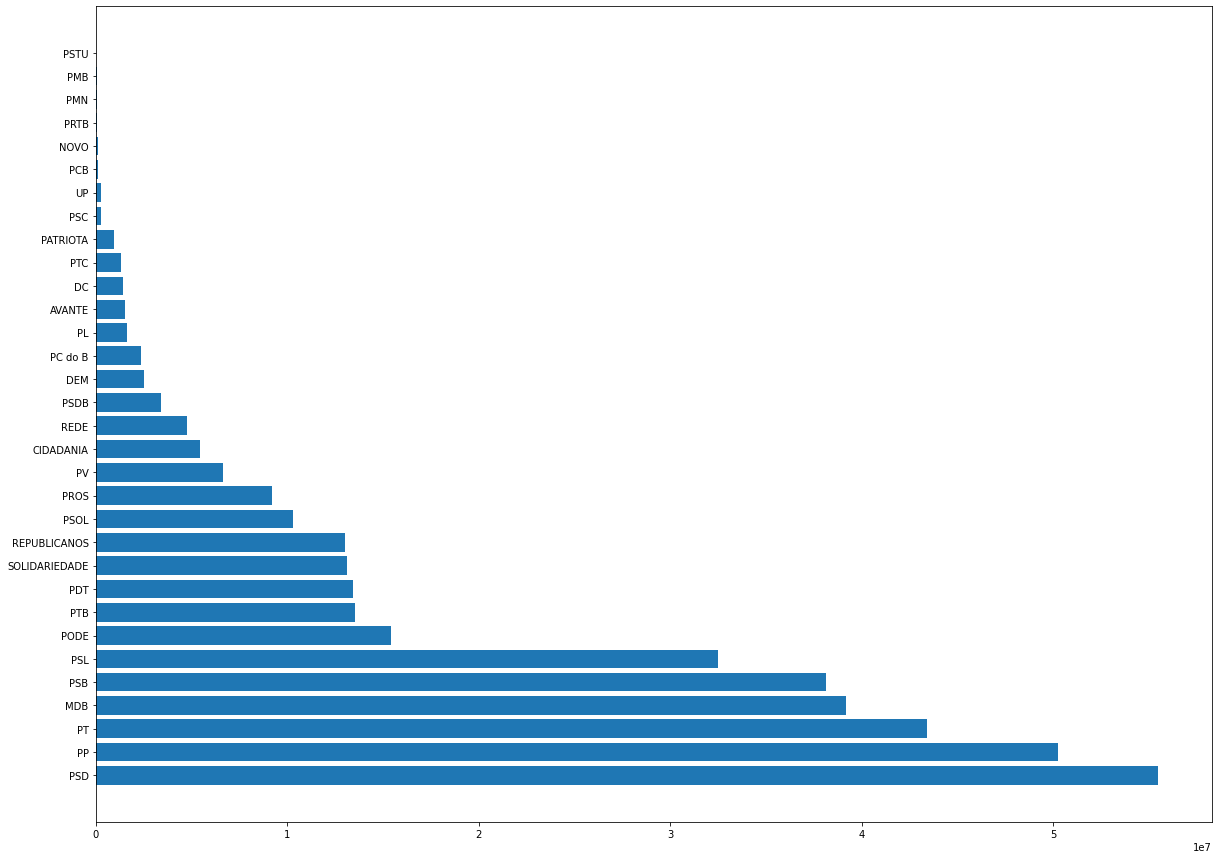

In [20]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.barh(eixo_x, eixo_y)
plt.show()